In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('../../Dataset/cancer_classification.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

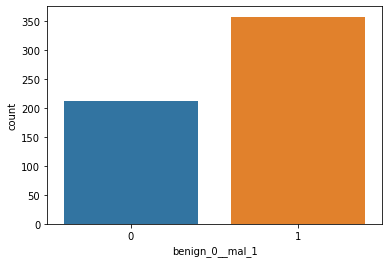

In [11]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

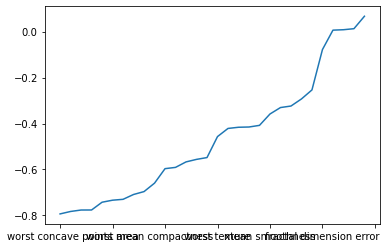

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot()

# Data spliting

In [13]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

1
Epoch 403/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.0375
Epoch 404/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 0.0369
Epoch 405/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.0363
Epoch 406/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.0378
Epoch 407/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0414
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0180 - val_loss: 0.0424
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0368
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0373
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0387
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0160 - val_l

In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

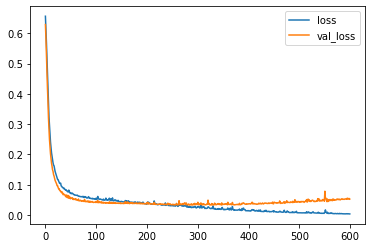

In [36]:
losses.plot()

In [37]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [41]:
model.fit(X_train, y_train, epochs=600 ,validation_data=(X_test, y_test), callbacks=[early_stop])

0s 5ms/step - loss: 0.1165 - val_loss: 0.0916
Epoch 28/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1250 - val_loss: 0.0895
Epoch 29/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0923 - val_loss: 0.0868
Epoch 30/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1101 - val_loss: 0.0842
Epoch 31/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0912 - val_loss: 0.0818
Epoch 32/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0894 - val_loss: 0.0812
Epoch 33/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0973 - val_loss: 0.0769
Epoch 34/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0992 - val_loss: 0.0783
Epoch 35/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0878 - val_loss: 0.0754
Epoch 36/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0833 - val_loss: 0.0730
Epoch 37/600
14/14 [==============================] - 

In [44]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

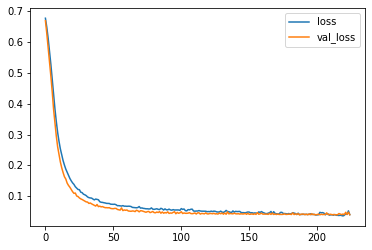

In [46]:
model_loss.plot()

In [47]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

#batch = epoch

In [50]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=([early_stop]))

 - 0s 6ms/step - loss: 0.1256 - val_loss: 0.1101
Epoch 25/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1229 - val_loss: 0.1060
Epoch 26/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1366 - val_loss: 0.1010
Epoch 27/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1244 - val_loss: 0.1006
Epoch 28/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1257 - val_loss: 0.0959
Epoch 29/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1183 - val_loss: 0.0917
Epoch 30/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1116 - val_loss: 0.0899
Epoch 31/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1069 - val_loss: 0.0852
Epoch 32/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1122 - val_loss: 0.0854
Epoch 33/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1046 - val_loss: 0.0817
Epoch 34/600
14/14 [==============================]

<AxesSubplot:>

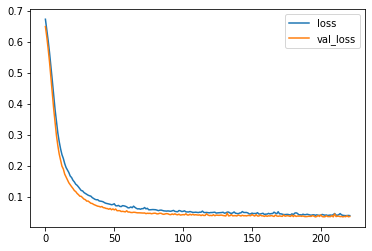

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [55]:
predictions = model.predict_classes(X_test)
predictions

C:\Users\Lof.respect\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.99      0.98      0.98        97

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[45  1]
 [ 2 95]]
